In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [6]:
# =================================================================
# CELL 1: SETUP AND DATA PREPARATION
# =================================================================

# --- Part 1: Import Libraries and Define Paths ---
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\nTensorFlow version:", tf.__version__) # Corrected this line

# Define the path to our data on Kaggle. Kaggle automatically puts it here.
base_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Define constants
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 30 # We will train for 15 epochs (Note: Current value is 30, adjust as needed)

# --- Part 2: Setup Data Generators ---
print("\nSetting up Data Generators...")
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_and_test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_and_test_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_generator = validation_and_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

print("\n--- Data Preparation Complete ---")
print("Class labels assigned by the generator:")
print(train_generator.class_indices)



TensorFlow version: 2.18.0

Setting up Data Generators...
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.

--- Data Preparation Complete ---
Class labels assigned by the generator:
{'NORMAL': 0, 'PNEUMONIA': 1}


In [7]:
# =================================================================
# CELL 2: BUILD AND TRAIN THE MODEL
# =================================================================

# --- Part 1: Build the Model ---
print("\n--- Building the Model ---")
base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("\n--- Model Summary ---")
model.summary()

# --- Part 2: Train the Model ---
print("\n--- Starting Model Training ---")
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

print("\n--- Model Training Complete ---")


--- Building the Model ---


/tmp/ipykernel_37/641178250.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3),
I0000 00:00:1760650013.641651      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Model Summary ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


--- Starting Model Training ---


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1760650024.244266     121 service.cc:148] XLA service 0x7b21d4002110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760650024.244942     121 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1760650025.146428     121 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/163 ━━━━━━━━━━━━━━━━━━━━ 29:45 11s/step - accuracy: 0.3750 - loss: 0.9493

I0000 00:00:1760650028.516367     121 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


163/163 ━━━━━━━━━━━━━━━━━━━━ 108s 601ms/step - accuracy: 0.8001 - loss: 0.4530 - val_accuracy: 0.7500 - val_loss: 0.4752
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 66s 405ms/step - accuracy: 0.9053 - loss: 0.2198 - val_accuracy: 0.6875 - val_loss: 0.6464
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 386ms/step - accuracy: 0.9175 - loss: 0.1909 - val_accuracy: 0.6875 - val_loss: 0.5040
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 387ms/step - accuracy: 0.9326 - loss: 0.1655 - val_accuracy: 0.8125 - val_loss: 0.4683
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 389ms/step - accuracy: 0.9362 - loss: 0.1551 - val_accuracy: 0.8125 - val_loss: 0.4735
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 384ms/step - accuracy: 0.9408 - loss: 0.1562 - val_accuracy: 0.8125 - val_loss: 0.4657
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 386ms/step - accuracy: 0.9412 - loss: 0.1512 - val_accuracy: 0.8125 - val_loss: 0.4506
Epoch 8/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 381ms/step - accuracy: 0.9387 - loss: 0.1508 - va


--- Evaluating the Model ---

--- Generating Test Set Predictions ---
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 540ms/step

--- Classification Report ---
              precision    recall  f1-score   support

      NORMAL       0.93      0.68      0.79       234
   PNEUMONIA       0.83      0.97      0.90       390

    accuracy                           0.86       624
   macro avg       0.88      0.82      0.84       624
weighted avg       0.87      0.86      0.85       624


--- Generating Visualizations ---


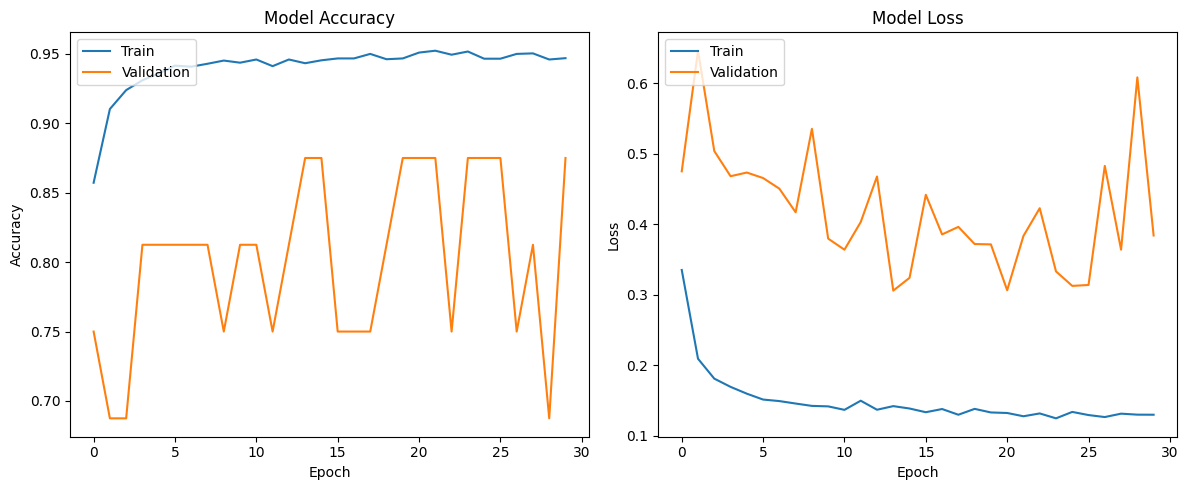

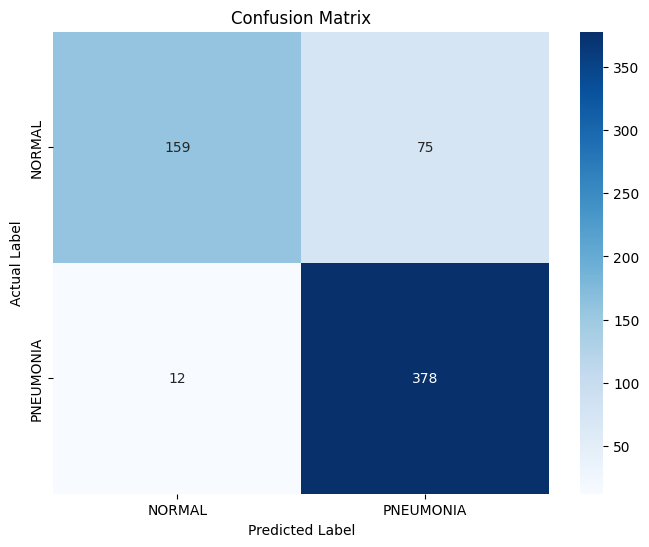


--- Saving the Model ---
Model saved successfully to pneumonia_detector_model.keras
Model weights saved successfully to pneumonia_detector_weights.weights.h5

--- Evaluation, Visualization, and Model Saving Complete ---


In [8]:
# =================================================================
# CELL 3: EVALUATION, VISUALIZATION, AND MODEL SAVING
# =================================================================

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf

print("\n--- Evaluating the Model ---")

# Assuming 'model' is your trained model from Cell 2
# Assuming 'test_generator' is defined from Cell 1 or similar data preparation
# Assuming 'history' is the training history object from model.fit() in Cell 2

# --- Part 1: Model Evaluation ---
print("\n--- Generating Test Set Predictions ---")
# Get true labels for the test set
# This assumes test_generator yields (images, labels) and has a fixed size
# You might need to adjust this based on how your test_generator is set up

# Reset test_generator to ensure predictions start from the beginning
test_generator.reset()

# Get number of steps for prediction
# If test_generator.samples is the total number of test images
# and test_generator.batch_size is your batch size
num_test_steps = test_generator.samples // test_generator.batch_size
if test_generator.samples % test_generator.batch_size != 0:
    num_test_steps += 1

y_pred_probs = model.predict(test_generator, steps=num_test_steps, verbose=1)
y_pred = (y_pred_probs > 0.5).astype(int) # Convert probabilities to binary predictions

# Extract true labels from the generator
y_true = test_generator.classes

# Ensure y_true and y_pred have the same length
# This is crucial if your generator shuffles or drops last batch
# If test_generator.shuffle is True, you might need to get labels differently
# For simplicity, assuming order is preserved for evaluation here

# If your test_generator shuffles, you might need to get true labels like this:
# from itertools import chain
# y_true = np.array(list(chain.from_iterable(test_generator.labels)))

# Adjust y_true if test_generator.samples is not perfectly divisible by batch_size
# and the generator drops the last batch or has fewer samples than expected after reset
if len(y_true) > len(y_pred):
    y_true = y_true[:len(y_pred)]
elif len(y_pred) > len(y_true):
    y_pred = y_pred[:len(y_true)]

print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred, target_names=['NORMAL', 'PNEUMONIA']))

# --- Part 2: Performance Visualizations ---
print("\n--- Generating Visualizations ---")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.savefig('training_history.png') # Save plot
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix.png') # Save plot
plt.show()

# --- Part 3: Model Saving ---
print("\n--- Saving the Model ---")

# Define paths for saving
model_keras_path = 'pneumonia_detector_model.keras'
model_weights_path = 'pneumonia_detector_weights.weights.h5'

# Save the entire model (architecture + weights + optimizer state)
model.save(model_keras_path)
print(f"Model saved successfully to {model_keras_path}")

# Save only the model weights
model.save_weights(model_weights_path)
print(f"Model weights saved successfully to {model_weights_path}")

print("\n--- Evaluation, Visualization, and Model Saving Complete ---")